In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4639 - accuracy: 0.8315
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3173 - accuracy: 0.8836
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2722 - accuracy: 0.8991
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2439 - accuracy: 0.9083
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2189 - accuracy: 0.9171


1/1 [==============================] - 0s 13ms/step


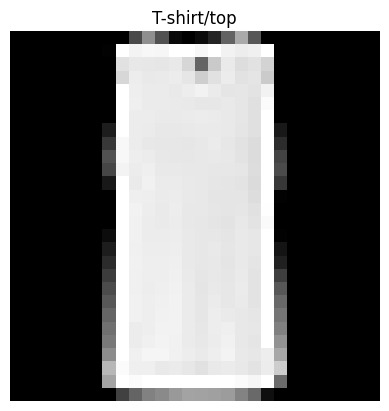

KeyboardInterrupt: Interrupted by user

In [5]:
for image in test_images:
    resized_image = image.reshape(1, 28, 28, 1)

    plt.imshow(image, cmap='gray')
    plt.axis('off')

    prediction = model.predict(resized_image)[0]
    plt.title(label_names[np.argmax(prediction)])

    plt.show()

    input("Press Enter to process the next image")

    clear_output(wait=True)